# Import Library

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import io
import os
from IPython.display import clear_output
import time 
from itertools import islice
from pathlib import Path
from keras.preprocessing import image
plt.rcParams['figure.figsize'] = (20, 5)

Using TensorFlow backend.


# Custom Function

In [2]:
def chunk(it, size):
    it = iter(it)
    return iter(lambda: tuple(islice(it, size)),())

In [3]:
def Delete_Picture(selection,pic_path):
    for i in range(len(selection)):
        if selection[i]=='0':
            print(f'Delete Pic: {pic_path[i]}')
            os.remove(pic_path[i])
            amount_dict[int(pic_path[i][5])]-=1
            delete_dict[int(pic_path[i][5])]+=1
            

# Import Data

In [5]:
pic_array_list=[]
pic_path_list=[]
pic_amount_list=[]
for i in range(8):
    pic_amount=len(sorted(Path(f'data/{i}').glob('*.png')))
    pic_amount_list.append(pic_amount)
    print(f'In label {i}: ',pic_amount)

for i in range(8):
    for pic_path in sorted(Path(f'data/{i+1}').glob('*.png')):
        pic_path_list.append(str(pic_path))
        try:
            image_array=np.array(image.load_img(pic_path,target_size=(150,150)),dtype='uint8')
        except:
            image_array=np.zeros((150,150,3),dtype='uint8')
        pic_array_list.append(image_array)

In label 0:  133
In label 1:  168
In label 2:  134
In label 3:  121
In label 4:  106
In label 5:  163
In label 6:  117
In label 7:  177


In [6]:
chunk_num=10
pic_array_chunk_list=list(chunk(pic_array_list,chunk_num))
pic_path_chunk_list=list(chunk(pic_path_list,chunk_num))
chunk_list=list(zip(pic_array_chunk_list,pic_path_chunk_list))

In [9]:
amount_dict={i:j for i,j in enumerate(pic_amount_list)}
delete_dict={i:0 for i in range(len(pic_amount_list))}

# Select Data

Total Pic:

{0: 133, 1: 168, 2: 134, 3: 121, 4: 106, 5: 163, 6: 117, 7: 177}

Delete Pic:

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0}


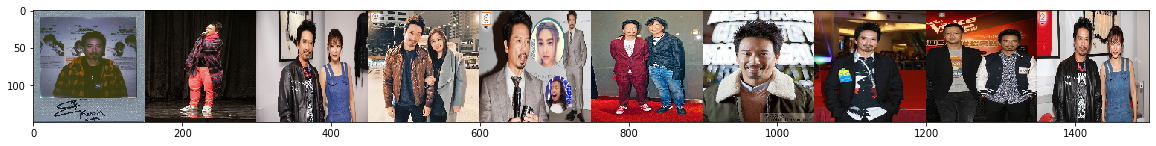

1 or 0(1:Useful,0:Useful): 1111111111


In [11]:
plt.rcParams['figure.figsize'] = (20, 5)
for chunk_set in chunk_list:
        pic_chunk=chunk_set[0]
        pic_path=chunk_set[1]
        print(f'Total Pic:\n\n{amount_dict}\n\nDelete Pic:\n\n{delete_dict}')
        try:
            combine_pic=np.concatenate(pic_chunk,axis=1)
        except:
            print([array.shape for array in pic_chunk])
            checker=pic_chunk
            break
        plt.imshow(combine_pic)
        plt.show()
        while True:
            selection=input("1 or 0(1:Useful,0:Useful): ")
            if len(selection)==chunk_num:
                Delete_Picture(selection,pic_path)
                time.sleep(0.1)
                break
            clear_output(wait=True)
        
        